Adapted from *Physics Simulations in Python -- A Lab Manual*, by Daniel V. Schroeder, Department of Physics, Weber State University, http://physics.weber.edu/schroeder/scicomp/

This work is licensed under the Creative Commons Attribution 4.0 International License.  To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Introduction

In this project you will explore the behavior of a pendulum.  There is no
better example of a system that seems simple at first but turns out to hold
intricate layers of complexity.

The figure below shows the basic setup:  a fixed pivot, a massless rod
of length $L$,
and a point-mass~$m$ at the end, swinging in the plane of the page.

![dummy](http://www.math.tau.ac.il/~haimav/PendulumSketch.png)

It's
easiest to analyze the motion in terms of torque and angular acceleration;
recall that the angular version of Newton's second law is
\begin{equation}
\sum \tau = I\alpha. \label{NewtonRotation}
\end{equation}
On the left-hand side of this equation is the sum of all the torques acting on the object.  On the right-hand side, $I$ is the object's rotational inertia, simply $mL^2$ for our
pendulum.  The angular acceleration $\alpha$ is defined analogously to the
ordinary acceleration:
\begin{equation}
\alpha = {d\omega\over dt} = {d^2\theta\over dt^2},
\end{equation}
where $\omega$ is the angular velocity and $\theta$ is assumed to be in radians.


From the diagram we see that the torque due to gravity is
\begin{equation}
\tau_{g} = - L|\vec F_g|\sin\theta = -Lmg\sin\theta,
\end{equation}
where the minus sign indicates that the torque is negative (clockwise)
when $\theta$ is positive, and vice-versa.  If there is no friction or other
torque acting, then Newton's law \eqref{NewtonRotation} says simply
\begin{equation}
-Lmg\sin\theta = mL^2\alpha, \qquad\hbox{or}\qquad \alpha = -{g\over L}\sin\theta.
\label{simplePendulumEq}
\end{equation}
Although we drew the diagram for a small positive value of $\theta$, this equation
is valid for all angles -- even angles greater than 90$^\circ$, if the
rod is rigid.

Because the mass $m$ has canceled out of \eqref{simplePendulumEq}, there will be no need to specify a mass in your pendulum simulation.  You might think you *do* need to specify a length $L$, and also a value of $g$ (depending on which planet the pendulum lives on), but in fact you don't, because we still have the freedom to choose our *units* for measuring distance and time. Our freedom to choose units means that whatever the actual values of $L$ and $g$, we can simply specify that we're using units in which both of these constants are equal to 1.  These units are called *natural units*. One advantage of using natural units is that \eqref{simplePendulumEq} becomes simply $\alpha=-\sin\theta$.  But the real advantage is that your simulation will be applicable to *any* pendulum on *any* planet.  The price is that in order to apply your results to a particular pendulum, you may need to convert them from natural units to more conventional units after running the simulation.

**Exercise.** Suppose (just for this exercise) that we want to study a pendulum on earth ($g = 9.8$ m/s$^2$) that is half a meter long.  Then our unit of distance will be a half meter; let's call this unit the *ham*.  Define a corresponding natural unit of time, called the *tic*, such that $g = 1.0$ ham/tic$^2$.  How many seconds are in a tic?


## Time Unit Conversion: "tic"

To establish the time unit "tic" for a pendul:th:
our variables are defined by :e use**: 
  - Gravitational accelerag = m/s^2
  m/s)^2
  - Unit of distance, 1 ham = 0.5 meters
  - g in natural units is 1.0 ham/tic^2

- **Step 1**: Convert g from m/s^2 to ham/tic^2:
  - 1.0 ham/tic^2 = 9.8 m/s^2 / 0.5 m/ham

- **Step 2**: Solve for tic^2:
  - tic^2 = 0.5 m / 9.8 m/s^2 = 0.051020408163265306 s^2

- **Step 3**: Calculate tic:
  - tic = sqrt(0.051020408163265306)  so fors ≈ 0.2259 s

### Conclusion:
One "tic" approximately equ
als 0.2259of  seconds. This unit conversion allows the simulation of the pendulum as we need using natural units.

**Exercise.** In order to draw a pendulum using VPython, you will need to express the position of the pendulum bob in rectangular coordinates.  Taking the origin to be at the pivot and the $x$ and $y$ directions to be to the right and upward, respectively, what are the formulas for $x$ and $y$ in terms of $\theta$?

**Answers:**

$x=L * \cos\theta$

$y=L * \sin\theta$




**Exercise.** In the cell below, write a program to simulate the motion of a pendulum swinging under the influence of gravity and no other torques.  Use the Euler algorithm, with the variables **theta** (in radians), **omega**, and **alpha** playing the roles of $y$, $v_y$, and $a_y$ in your original p
rojectile simulation (from the previous project).  Check carefully that the order of the lines in the algorithm is the same as in the example in the second project.  In the 3D graphics space, represent the pendulum bob as a sphere, the pendulum rod as a cylinder, and the pivot at the other end of the rod as a short cylinder perpendicular to the plane of motion.  You may optionally wish to draw a stand of some sort to "support" the pivot.  Use natural units with $g=L=1$ (so you don't need these variables at all!), and a time step of 0.01 in these units.  Choose initial conditions such that the amplitude of the swing will be fairly small.  Once everything seems to be working, let the simulation run for a while and describe what you observe.

In [3]:
from vpython import *

# Create a canvas 
simulation_canvas = canvas(title='Pendulum Simulation',
                           width=600, height=400,
                           background=color.white)

# graph plotting theta vs time
theta_graph = graph(width=450, height=450, title='Theta vs Time', xtitle='t (s)', ytitle='theta (radians)')
theta_plot = gdots(color=color.blue, interval=100)  # Set plotting interval to 10

# constants
g = 1.0  # acceleration due to gravity in natural units
L = 1.0  # length of the pendulum in natural units
dt = 0.00001  # time step

# Initial conditions
theta = 0.2  # initial angle 
omega = 0.0  # initial angular velocity
t = 0  

# create pendulum 
pivot = vector(0, 0, 0)  
bob = sphere(pos=vector(L * sin(theta), -L * cos(theta), 0), radius=0.05, color=color.yellow)
rod = cylinder(pos=pivot, axis=bob.pos - pivot, radius=0.02, color=color.white)
stand = cylinder(pos=vector(0, 0, 0), axis=vector(0, -0.1, 0), radius=0.02, color=color.blue)

# Define axes (x, y, z) - not part of the question , more comfort for me .
axis_length = 1.5
x_axis = arrow(pos=vector(0, 0, 0), axis=vector(axis_length, 0, 0), color=color.red, shaftwidth=0.02)
y_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, axis_length, 0), color=color.green, shaftwidth=0.02)
z_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, 0, axis_length), color=color.blue, shaftwidth=0.02)

def calculate_energy(theta, omega):
    return 0.5 * omega**2 + (1 - cos(theta))


initial_energy = calculate_energy(theta, omega) 

print(' total energy at the begining is :',initial_energy) 


# loop
while True:
    if t >= 50:
        break
    
    rate(1/dt)  
    
    # Calculate angular acceleration at the beginning of the interval
    alpha = -g / L * sin(theta)

    # Update angular velocity and angle
    theta += omega * dt
    omega += alpha * dt
   
    # Update positions of bob
    bob.pos = vector(L * sin(theta), -L * cos(theta), 0)
    rod.axis = bob.pos - pivot

    # Plot theta vs time
    theta_plot.plot(t, theta)

    t += dt



# Calculate final energy
final_energy = calculate_energy(theta, omega)
print('Final Total Energy :', final_energy)




<IPython.core.display.Javascript object>

 total energy at the begining is : 0.019933422158758374
Final Total Energy : 0.019943329456855452


**Your observations:** we can see the movement behavior of the palladium when we change the variable of theta and omega.

**Exercise.** To the program in the previous cell, add a graph of $\theta$ (vertically) vs. $t$ (horizontally).  Be sure to label the axes appropriately.  Set the plotting **interval** to 10, in order to reduce the slow-down that will occur as more and more points are added to the graph.  (Throughout the rest of this project, use your discretion to adjust the plotting interval as appropriate.)  Use your graph to determine the approximate period of the pendulum in natural units, and write down the result.  Does your result agree with what you learned in introductory physics?  Explain.

**Explanation**: 

In the graph, we can see that the approximate period of the pendulum is roughly 6.2 (as i checked on the graph).

Yes, I agree with the result, but this is not the best approximation by our code. We know which by formula:

T = 2π * sqrt(L / g)

So, when we set L = 1 and g = 9.8, we will get T = 2π ≈ 6.28. pretty similar as shown on the graph.


# Accuracy over long time periods

**Exercise.** Use the program in the cell above to run for about 50 units of time, then run it.  Describe the appearance of the graph of $\theta$ vs. $t$ in the cell below, and explain what's wrong with it.



**Answers:** 

There should be a difference in the total energy at the end and at the beginning of the simulation (due to numerical problems),
the amplitude in the graph will appear uneven in each cycle.imulation.


**Exercise.** Work out a formula for the total energy (kinetic plus gravitational)
of the pendulum, in terms of $\theta$, $\omega$, and constants.  Take the gravitational energy to be zero at the lowest point of the pendulum's swing.  (Use a picture
and some trigonometry to relate $\theta$ to the height of the pendulum bob. Do not
set $g = L = 1$ in this exercise.)

### Total Energy of a Pendulum

To calculate the total energy of a pendulum, we consider both kinetic and potential energies. The total energy is the sum of the kinetic energy by the motion and the gravitational potential energy by height.

#### Kinetic Energy (KE)

The kinetic energy of the pendulum is :

$$ KE = \frac{1}{2} m v^2 $$

where \(m\) is the mass of the bob, and \(v\) is its velocity. The velocity \(v\) can be expressed by the angular velocity \(\omega\) :

$$ v = L \omega $$

where \(L\) is the length of the pendulum rod. Therefore, the kinetic energy equation becomes:

$$ KE = \frac{1}{2} m (L \omega)^2 = \frac{1}{2} mL^2 \omega^2 $$

#### Potential Energy (PE)

The potential energy is dependent on the height of the pendulum above its lowest point. If the pendulum is displaced by an angle \(\theta\) from the vertical position, its height \(h\) can be described by the formula :

$$ h = L - L \cos(\theta) = L(1 - \cos(\theta)) $$

Therefore, the potential energy is:

$$ PE = mgh = mgL(1 - \cos(\theta)) $$

#### Total Energy (E)

Combining the kinetic and potential energies to get the total energy of the pendulum is:

$$ E = KE + PE = \frac{1}{2} mL^2 \omega^2 + mgL(1 - \cos(\theta)) $$

This formula indicates that the total energy of the pendulum, should be conserved in the absence of non conservative forces like air resistance or friction.
servative force.se pivot.
or friction at the pivot.


**Exercise.** Add some lines to your program to compute and print the total
energy of the pendulum at both the beginning and the end of the simulation.  For the
purpose of this computation, you should continue to take $L$, $g$, and $m$ all to equal $1$ (in natural units).  Write the results below, and explain why something
must be wrong.

**Answers:**  
at our system we suppose to get same total energy at every point of the pendulum, because we have no damping or external forces,
in our csae we can see which we get a total energy at the beginning and the end of the simulation differs significantly (add them below) ,probably this happened because the simulation has numerical errors . (when we use de = 0.01)

total energy at the begining is : 0.019933422158758374, 

Final Total Energy : 0.03273548172250257.

**Exercise.** Run the simulation again with a smaller value of **dt**.  (Be sure to adjust your *rate* function and graphing **interval** accordingly.)  How do the results change?  Is this what you would expect?

**Answers:**

for dt=0.00001 (and smaller) we can see which the energy is conserved, the intital energy ans the final energy are very close.

when we try a bigger dt, the enrgy is not conserved by our calculatio.

because dt=0.00001, is very small we can conclude which our algorithm isnt enough accurate.

the graphe of \theta vs t is look same , but more accurate by dt smaller.
a * dt
    t += dt


The preceding exercises illustrate a common problem with numerical calculations:
small truncation errors can add up over time to produce large inaccuracies.
When a quantity such as the total energy is supposed to be exactly conserved,
you should always monitor this quantity for any significant drift that might
come from compounded truncation errors.  While using a smaller time step
can provide a brute-force solution to this problem, it's usually better to
switch to a more accurate algorithm (if possible).

**Exercise.** In the cell below write a new version of the program that uses the Euler-Richardson
algorithm instead of the Euler algorithm.  For a time step of 0.01 and
a total running time of 50 time units, how much does the total energy drift?

In [1]:

from vpython import *

# create a canvas
simulation_canvas = canvas(title='Pendulum Simulation',
                           width=600, height=400,
                           background=color.white)

# graph plotting theta vs time
theta_graph = graph(width=450, height=450, title='Theta vs Time', xtitle='t (s)', ytitle='theta (radians)')
theta_plot = gdots(color=color.blue, interval=10) 

# Constants
g = 1.0  # gravity in natural units
L = 1.0  # length natural units
dt = 0.01  # time steps


# Initial conditions
theta = 0.2  
omega = 0.0  
t = 0  

# Create pendulum 
pivot = vector(0, 0, 0)  # pivot point at the origin
bob = sphere(pos=vector(L * sin(theta), -L * cos(theta), 0), radius=0.05, color=color.yellow)
rod = cylinder(pos=pivot, axis=bob.pos - pivot, radius=0.02, color=color.white)
stand = cylinder(pos=vector(0, 0, 0), axis=vector(0, -0.1, 0), radius=0.02, color=color.blue)


# Define axes (x, y, z)
axis_length = 1.5
x_axis = arrow(pos=vector(0, 0, 0), axis=vector(axis_length, 0, 0), color=color.red, shaftwidth=0.02)
y_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, axis_length, 0), color=color.green, shaftwidth=0.02)
z_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, 0, axis_length), color=color.blue, shaftwidth=0.02)

def calculate_energy(theta, omega):
    return 0.5 * omega**2 + (1 - cos(theta))

begining_energy = calculate_energy(theta, omega)
print('total energy at the begining is :',begining_energy) 


# simulation loop
while True:
    if t >= 50:
        break
    
    rate(1/dt)  
    
    # Calculate angular acceleration 
    alpha = -g / L * sin(theta)

    # Update angular velocity and angle
    mid_omega = omega - 0.5 * g * sin(theta) * dt / L
    mid_theta = theta + 0.5 * mid_omega * dt

    mid_alpha = -g * sin(mid_theta) / L

    
    
    theta += mid_omega * dt
    omega += mid_alpha * dt
    
    
    # Update positions
    bob.pos = vector(L * sin(theta), -L * cos(theta), 0)
    rod.axis = bob.pos - pivot

    # Plot theta vs time
    theta_plot.plot(t, theta)

    t += dt



# calculate final energy
final_energy = calculate_energy(theta, omega)
print("final_energy",final_energy)

print("total energy drift :" ,abs(begining_energy-final_energy))




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

total energy at the begining is : 0.019933422158758374
final_energy 0.019933355720869985
total energy drift : 6.643788838869846e-08


**Answers:**  
the total energy drift is : 6.643788838869846e-08

so now we can say which our algorithm describe better our system, with dt = 0.01.

In subsequent steps, make sure to **not modify** the cell above. You will copy it to cells below and modify it, but we want to keep the current version intact since we will return to it. Let's call the program in the last cell by the name ``Pendulum1``.

# Large-angle motion

Now that you've minimized your program's numerical inaccuracies,
let's examine how the motion varies when the amplitude is changed.

Although you can read the approximate period of the pendulum
from your graph, it's much more accurate to have the program calculate and
print the period.  Here's one way to do this:  Introduce a variable called
**lastTheta**, and set it equal to **theta** just before each time
**theta** is updated.  After updating **theta**, check whether **theta**
is positive and **lastTheta** is negative.  If so, the pendulum has just crossed
$\theta=0$ while moving from left to right.  In this case, do an interpolation to compute the time when the crossing occurred (like when you computed the time the projectile landed in the previous project) and remember this time in another variable.  The time between
one such crossing and the next equals the period of the pendulum.

**Exercise.** Copy the ``Pendulum1`` program to the cell below, comment-out the code to calculate and display the pendulum's initial and final energy (by placing a ``#`` character in front of each line).  Then implement the algorithm just described for determining the period of the pendulum.  Check to make sure it works.  Also modify your simulation loop so it stops right after calculating and printing the period. Explain how did you verify your code is correct.

In [5]:
# calculate amplitude vs periods

from vpython import *

# constants
g = 1.0  
L = 1.0  
dt = 0.01  

# create a canvas 
simulation_canvas = canvas(title='Pendulum Simulation', width=600, height=400, background=color.white)

# Define axes (x, y, z)
axis_length = 1.5
x_axis = arrow(pos=vector(0, 0, 0), axis=vector(axis_length, 0, 0), color=color.red, shaftwidth=0.02)
y_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, axis_length, 0), color=color.green, shaftwidth=0.02)
z_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, 0, axis_length), color=color.blue, shaftwidth=0.02)

amplitudes = []
periods = []

# Loop - amplitudes from 10 to 170 degrees
for angle_deg in range(10, 180, 10):
    
    amplitudes.append(angle_deg)
    
    theta = radians(angle_deg)  # Convert angle to radians
    omega = 0.0  # initial angular velocity
    t = 0  # start time
    lastTheta = theta  # Initialize lastTheta with the initial theta
    lastCrossingTime = None  # to store the time of the last zero crossing

    # graph for plotting theta vs time
    theta_graph = graph(width=450, height=450, title=f'Theta vs Time for Angle {angle_deg} degrees', xtitle='t (s)', ytitle='theta (radians)')
    theta_plot = gdots(graph=theta_graph, color=color.blue, interval=10)  # Set plotting interval

    # create pendulum 
    pivot = vector(0, 0, 0)  # pivot point at the origin
    bob = sphere(pos=vector(L * sin(theta), -L * cos(theta), 0), radius=0.05, color=color.yellow)
    rod = cylinder(pos=pivot, axis=bob.pos - pivot, radius=0.02, color=color.white)

    
    # simulation loop
    while True:
        rate(100) 
        
        # Euler Richardson method
        alpha = -g / L * sin(theta)
        mid_omega = omega + 0.5 * alpha * dt
        mid_theta = theta + 0.5 * mid_omega * dt
        mid_alpha = -g / L * sin(mid_theta)
        
        new_omega = omega + mid_alpha * dt
        new_theta = theta + mid_omega * dt

        # Check for zero crossing from negative to positive
        if lastTheta < 0 and new_theta >= 0:
            # Linear interpolation to find the exact crossing time
            interpTime = t + (0 - lastTheta) / (new_theta - lastTheta) * dt
            if lastCrossingTime is not None:
                period = interpTime - lastCrossingTime
                periods.append(period)  
                print(f"{angle_deg}\t{period:.2f}")
                break  # Exit the inner loop after printing one period
            lastCrossingTime = interpTime

        # Update positions 
        bob.pos = vector(L * sin(new_theta), -L * cos(new_theta), 0)
        rod.axis = bob.pos - pivot
        
        # Plot theta vs time
        theta_plot.plot(t, new_theta)

        # Update variables 
        lastTheta = new_theta  
        theta = new_theta
        omega = new_omega
        t += dt



<IPython.core.display.Javascript object>

10	6.30
20	6.33
30	6.39
40	6.48
50	6.60
60	6.74
70	6.92
80	7.15
90	7.42
100	7.74
110	8.14
120	8.63
130	9.24
140	10.02
150	11.07
160	12.61
170	15.33


**Explain how did you verify your code is correct**

We got the period of the pendulum as: 6.298902863232729, and as we know by the formula ehich the period is described by the formula:

T = 2π * sqrt(L / g)

because L = g = 1, we expect T to be roughly 2π (approximately 6.283), and it's close to our result from the code: "Period of the pendulum is: 6.298902863232729"

according the instruction i suppose to delete the code of this part , instead of this i put the code in commas .




**Excercise.** Modify the cell above to run the simulation successively for amplitudes 10$^\circ$, 20$^\circ$, and so on up to 170$^\circ$, printing out a table with the amplitude (in degrees) in the first column and the period in the second column.  To do this, you'll want to embed your entire simulation loop inside a larger **while** loop that loops over the amplitude values, reinitializing the pendulum each time through.  Be sure to adjust the indentation appropriately, and be careful converting angles from degrees to radians and then back again.  If you would like to reinitialize the graph of $\theta$ vs. $t$ for each new amplitude, you can do this by calling the *delete()* function of your **gdots** object.  Another useful trick is to put a tab character, ``"\t"``, between the amplitude and period in your *print* output.  Check that everything works, so you get a table as intended in the print area.

Of course, a graph of period vs. amplitude would be better than a mere table of numbers.  You could easily produce such a graph, by adding just a few lines to your code.  Often, however, for graphing final results we use a different software environment than what we used for the simulation itself.  In this case, it is convenient to use a library called *matplotlib* to draw graphs right inside the notebook.

**Excercise.**  Use the internet to learn how to install and use matplotlib. Use matplotlib  to make a scatter plot of period (vertically) vs. amplitude (horizontally), making sure to have axis labels set correctly. A working complete code for making the scatter plot should be written in the cell below, and the graph should appear below it (after running).

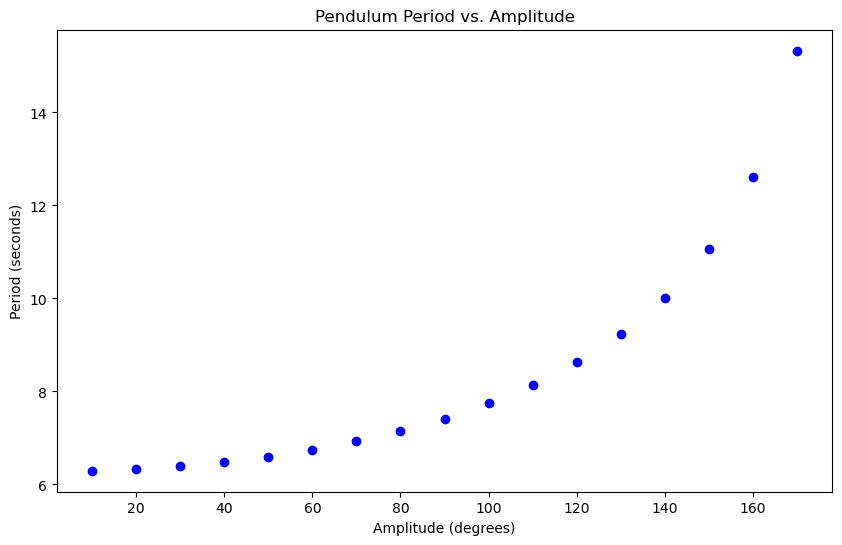

In [8]:
#print(len(amplitudes) , '\n' , len(periods)) 
#print(amplitudes , '\n' , periods)

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  
plt.scatter(amplitudes, periods, color='b') 


plt.title('Pendulum Period vs. Amplitude')
plt.xlabel('Amplitude (degrees)')
plt.ylabel('Period (seconds)')

plt.show()

# Friction and driving forces

Now let's add some further complications:  Friction to slow the pendulum down,
and a periodic external torque that continually adds energy to the system.

A simple way to add friction is to subtract a term proportional to $\omega$
from the right-hand side of \eqref{simplePendulumEq} for the angular
acceleration:
\begin{equation}
\alpha = -{g\over L}\sin\theta - c\,\omega.  \label{alphaWithDamping}
\end{equation}
A linear resistive force (or torque) of this form is called *damping*,
and the coefficient $c$ is called the damping constant.

**Exercise.**  Copy your original ``Pendulum1`` to the cell below, remove the code that calculates and displays the initial and final energies (since we no longer expect energy to be conserved).  Then add a damping term to the lines that compute **alpha** and **alphaMid**.  Run the program for various values of the damping constant, ranging up to about 2.0.  Describe the results briefly.

In [13]:
# pendulum 2

from vpython import *

# Constants
g = 1.0  #gravity in natural units
L = 1.0  # length natural units
dt = 0.01  #time steps
#c = 0.5  # damping constant


# torque
damp = 0.5  # damping 
driveAmp = 0.5  # driving amplitude
driveFreq = 2/3  # driving frequency

def torque(theta, omega, t):
    return -g / L * sin(theta) - damp * omega + driveAmp * sin(driveFreq * t)



# Create a canvas 
simulation_canvas = canvas(title='Pendulum Simulation with Damping',
                           width=600, height=400,
                           background=color.white)

# Graph for plotting theta vs time
theta_graph = graph(width=450, height=450, title='Theta vs Time', xtitle='t (s)', ytitle='theta (radians)')
theta_plot = gdots(color=color.blue, interval=10)  # Set plotting interval to 10


# Initial conditions
theta = 0.2  
omega = 0.0 
t = 0 

# Create pendulum 
pivot = vector(0, 0, 0)  # pivot point at the origin
bob = sphere(pos=vector(L*sin(theta), -L*cos(theta), 0), radius=0.05, color=color.yellow)
rod = cylinder(pos=pivot, axis=bob.pos - pivot, radius=0.02, color=color.white)
stand = cylinder(pos=vector(0, 0, 0), axis=vector(0, -0.1, 0), radius=0.02, color=color.blue)



# Define axes (x, y, z)
axis_length = 1.5
x_axis = arrow(pos=vector(0, 0, 0), axis=vector(axis_length, 0, 0), color=color.red, shaftwidth=0.02)
y_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, axis_length, 0), color=color.green, shaftwidth=0.02)
z_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, 0, axis_length), color=color.blue, shaftwidth=0.02)



# Simulation loop
while t <= 100:  # Changed from infinite loop to fixed time to make it more manageable
    rate(100)  

    
    # Calculate angular acceleration using the torque function
    alpha = torque(theta, omega, t)

    
    # Euler-Richardson method
    mid_omega = omega + 0.5 * alpha * dt
    mid_theta = theta + 0.5 * mid_omega * dt
    mid_alpha = torque(mid_theta, mid_omega, t + 0.5 * dt)
    
    
  
    omega += mid_alpha * dt
    theta += mid_omega * dt

    
    # Update positions
    bob.pos = vector(L * sin(theta), -L * cos(theta), 0)
    rod.axis = bob.pos - pivot

    # Plot theta vs time
    theta_plot.plot(t, theta)

    t += dt

# No energy calculations as energy is not conserved due to damping


<IPython.core.display.Javascript object>

**Answers:**

we can see two main results :

1. desrceasing in th amplitude: 
Damping causes a rapid decrease in the amplitude of the pendum's oscillations, limitits swing height with each pass.

2. Shortened Oscillation Duration: 
Higher damping constants make the pendulum to stop faster.



Damping removes energy from the pendulum, so the motion dies out.  But we
can keep the motion going by continually applying an external torque to the
pendulum.  A simple yet interesting way to do this is to add a term to
equation \eqref{alphaWithDamping} that is sinusoidal in time:
\begin{equation}
\alpha = -{g\over L}\sin\theta - c\,\omega + A\sin(f t).
\label{alphaWithDrive}
\end{equation}
This additional term is called a *driving* term.
Physically, it would represent a smooth, back-and-forth twisting
force, presumably applied at the pivot, that is unaffected by the pendulum's position and speed.  The
constants $A$ and $f$ represent the amplitude and angular frequency of
the driving torque.

Because the Euler-Richardson algorithm requires two calculations of $\alpha$
(one at the beginning of the time interval and one at the middle), and 
because the formula for $\alpha$ is getting rather complex, it's a good idea
to move this calculation into a separate function.
Let's call the function *torque*, which is the same as angular acceleration
in our system of units.  This function should accept three parameters---
$\theta$, $\omega$, and $t$---and return the value of the torque.   Assume that the constants **damp**, **driveAmp**, and **driveFreq** have already been defined. When you call the *torque* function from elsewhere in your program you can pass it any values you like for these three variables, and it will return the appropriate torque.

**Exercise.** Add this function definition to the cell above. Use it
appropriately each time your program computes the angular acceleration.
(Be sure to pass the correct values to your *torque* function 
for the mid-point calculation!)
Test your program with the damping constant equal to 0.5, the drive amplitude
equal to 0.5, and the drive frequency equal to 2/3.   You should find that after an
initial "transient" behavior, the motion becomes periodic.  What is the approximate period of the motion? 

**Answers:** 

By checking the graph of (\theta) vs (t), we can see that the period is roughly 9.5 seconds. 

Again, in subsequent steps, make sure to **not modify** the last code cell. You will copy it to cells below and modify it, but we want to keep the current version intact since we will return to it. Let's call the program in the last code cell by the name ``Pendulum2``.

# Chaos!

**Exercise.** Now increase the drive amplitude to 1.2, and run the program again
(for about 100 time units).  Describe the behavior briefly.

**Answers:** 

With a drive amplitude of 1.2, the pendulum will experience much larger swings.

there is a higher energy input which can overcome the damping effect more significantly than before, and allowing the pendulum to swing with a greater range.

i did it by replace the constant in the last cell and run the code .

When the drive amplitude is sufficiently large, the pendulum can swing
over the top of the pivot and the motion becomes much more complex. In some
cases, such as the one you just saw, the motion never settles down to become
periodic.  Because the motion seems so unpredictable, the word "chaos"
often comes to mind.

**Chaos** is actually a technical term in dynamics, used to describe
behavior that is unpredictable in practice because even a tiny change in the
initial condition results in an exponentially increasing change in the motion.
A good way to test for chaotic behavior is to run a simulation twice, with
two slightly different initial conditions, and monitor the difference in the
motion as a function of time.

**Exercise.**  Make a copy of ``Pendulum2`` to the cell below.  Then modify it to simulate the
motion of \textit{two} damped, driven pendulums simultaneously.  Use two
sets of variables for the two separate pendulums, and simulate both
motions using a single **while** loop in your code.  Call the new variables **theta2**, **omega2**, and so on.  I'll refer to the angle of the original pendulum as $\theta_1$.  In the 3D graphics space, put the second pendulum in front of the first, suspended from the same pivot.  Also add code to plot both $\theta_1$ and $\theta_2$ vs. time, using two different colors (it's a nice touch to use the same colors for the pendulums in the 3D graphics space that you use on the graph).  Use vpython plotting functions. Start one pendulum at $\theta=0$ and the other at $\theta=0.001$ (radians), with $\omega=0$ initially for both, and run for about 200 units of time.  Use the same damping and driving constants as in the two previous exercises, and describe the results for both values of the driving amplitude.  Keep the more interesting of the two graphs.

In [17]:
from vpython import *
import math

# Constants
g = 1.0  
L = 1.0  
dt = 0.01  
damp = 0.5  
driveAmp = 1.2  
driveFreq = 2/3  


# function to calculate torque
def torque(theta, omega, t):
    return -g / L * sin(theta) - damp * omega + driveAmp * sin(driveFreq * t)


# Create a canvas
simulation_canvas = canvas(title='Dual Pendulum Simulation with Damping',
                           width=600, height=400,
                           background=color.white)


# graph for plotting theta vs time
theta_graph = graph(width=450, height=450, title='Theta vs Time', xtitle='t (s)', ytitle='theta (radians)')
theta1_plot = gdots(graph=theta_graph, color=color.blue, interval=10)  # Set plotting interval for first pendulum
theta2_plot = gdots(graph=theta_graph, color=color.red, interval=10)  # Set plotting interval for second pendulum

theta_diff_log_graph = graph(width=450, height=450, title='Log of Angle Difference vs Time', xtitle='Time (s)', ytitle='ln|theta1 - theta2|')
log_diff_plot = gdots(graph=theta_diff_log_graph, color=color.green, interval=10)



# Initial conditions for pendulums 
theta1 = 0.001  #  angle 
omega1 = 0.0  #  angular velocity

theta2 = 0.0  #  angle
omega2 = 0.0  # angular velocity

t = 0  # start time


# create pendulum 
pivot = vector(0, 0, 0)  # pivot point at the origin
bob1 = sphere(pos=vector(L*sin(theta1), -L*cos(theta1), 0.1), radius=0.05, color=color.blue)  # offset in z for clarity
rod1 = cylinder(pos=pivot, axis=bob1.pos - pivot, radius=0.02, color=color.blue)

bob2 = sphere(pos=vector(L*sin(theta2), -L*cos(theta2), -0.1), radius=0.05, color=color.red)  # offset in z for clarity
rod2 = cylinder(pos=pivot, axis=bob2.pos - pivot, radius=0.02, color=color.red)


# define axes (x, y, z)
axis_length = 1.5
x_axis = arrow(pos=vector(0, 0, 0), axis=vector(axis_length, 0, 0), color=color.red, shaftwidth=0.02)
y_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, axis_length, 0), color=color.green, shaftwidth=0.02)
z_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, 0, axis_length), color=color.blue, shaftwidth=0.02)



while t <= 200:  
    rate(100)  
    
    # calculate torque 
    alpha1 = torque(theta1, omega1, t)
    alpha2 = torque(theta2, omega2, t)
    
    # update angular velocity and angle
    mid_omega1 = omega1 + 0.5 * alpha1 * dt
    mid_theta1 = theta1 + 0.5 * mid_omega1 * dt
    mid_alpha1 = torque(mid_theta1, mid_omega1, t + 0.5 * dt)
    
    mid_omega2 = omega2 + 0.5 * alpha2 * dt
    mid_theta2 = theta2 + 0.5 * mid_omega2 * dt
    mid_alpha2 = torque(mid_theta2, mid_omega2, t + 0.5 * dt)
    
    omega1 += mid_alpha1 * dt
    theta1 += mid_omega1 * dt
    omega2 += mid_alpha2 * dt
    theta2 += mid_omega2 * dt


    # log of absolute difference between theta1 and theta2
    log_diff = math.log(abs(theta1 - theta2))
    
    
    # update positions
    bob1.pos = vector(L*sin(theta1), -L*cos(theta1), 0.1)
    rod1.axis = bob1.pos - pivot
    bob2.pos = vector(L*sin(theta2), -L*cos(theta2), -0.1)
    rod2.axis = bob2.pos - pivot

    # Ploting theta vs time
    theta1_plot.plot(t, theta1)
    theta2_plot.plot(t, theta2)
    log_diff_plot.plot(t, log_diff)

    
    # increment time
    t += dt


<IPython.core.display.Javascript object>

**Exercise.** To better see how the motions of the two pendulums relate to each other,
modify the last cell to produce a second graph, plotting $\ln|\theta_2-\theta_1|$ vs. $t$.  The python function for the natural logarithm is
*math.log*.  Run your program using the same constants as before, including both values
(0.5 and 1.2) of the drive amplitude.  This time it should suffice to run for about 80 units of time.  Discuss the results in some detail in the cell below.  Why do both plots have several 
downward-pointing spikes?

**Answers:**

for drive ampiltude = 0.5, its look like there is no a diffrent between the pendulums, not make a chaotic behavior . 

and for for drive amplitude = 1.2 , we can see a chaotic behavior as t become larger,
Sharp spikes in the log plot indicate about the moments where the pendulums paths cross or where one pendulum catches up with the other. A steady decrease show synchronization between the pendulums, whereas increased fluctuations indicate chaotic behavior.

# When is the motion chaotic?

So far you have explored the motion of the damped and driven pendulum for only two sets of damping and driving parameters---one that produces chaotic behavior and one that doesn't.  Your final task will be to map out in more detail which conditions produce chaos.

In principle you could vary the damping constant, the driving frequency, *and* the driving amplitude---but thoroughly exploring that three-parameter space would take a long time.  Instead, you will keep the damping constant and the driving frequency fixed at the same values as before, and vary only the driving amplitude.

**Exercise.** Copy the ``Pendulum3`` program (which simulates only a single damped and driven pendulum) to the cell below, change the simulation loop to run indefinitely, but add a GUI button to pause and resume the simulation.  Then add a slider to adjust the driving amplitude to any value between 0 and 2.0, in increments of 0.01.  Be sure to create a numerical readout for the slider.  Test these controls to make sure they work.

In [1]:

from vpython import *
from math import pi 

g = 1.0  
L = 1.0  
dt = 0.01  
damp = 0.5  
driveFreq = 2/3 
driveAmp = 1.2  

# function to calculate torque
def torque(theta, omega, t):
    return -g / L * sin(theta) - damp * omega + driveAmp * sin(driveFreq * t)

# create the canvas
scene = canvas(title='Pendulum Simulation with Phase Space', width=600, height=400, background=color.white)
phase_space_graph = graph(width=450, height=450, title='Phase Space: Omega vs Theta', xtitle='Theta (radians)', ytitle='Omega (radians/s)', xmin=-pi, xmax=pi)
phase_space_plot = gdots(graph=phase_space_graph, color=color.blue, size=1, interval=10)

# define axes (x, y, z)
axis_length = 1.5
x_axis = arrow(pos=vector(0, 0, 0), axis=vector(axis_length, 0, 0), color=color.red, shaftwidth=0.02)
y_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, axis_length, 0), color=color.green, shaftwidth=0.02)
z_axis = arrow(pos=vector(0, 0, 0), axis=vector(0, 0, axis_length), color=color.blue, shaftwidth=0.02)

# Initial conditions
theta = 0.2
omega = 0.0
t = 0

# Pendulum setup
pivot = vector(0, 0, 0)
bob = sphere(pos=vector(L*sin(theta), -L*cos(theta), 0), radius=0.05, color=color.yellow)
rod = cylinder(pos=pivot, axis=bob.pos - pivot, radius=0.02, color=color.white)

# Control variables
running = True

# Function to control the running/pausing of the simulation
def Run(b):
    global running
    running = not running
    b.text = 'Run' if not running else 'Pause'

# Button to pause\resume 
pause_btn = button(text='Pause', pos=scene.title_anchor, bind=Run)

# Function to clear the plot
def clear_plot(b):
    phase_space_plot.delete()

# Button to clear the plot
clear_btn = button(text='clear plot', pos=scene.title_anchor, bind=clear_plot)

# Slider to adjust the driving amplitude
def adjust_drive_amplitude(slider):
    global driveAmp
    driveAmp = slider.value
    wtext.text = f'Drive Amplitude: {driveAmp:.2f}'

amplitude_slider = slider(min=0, max=2.0, value=1.2, step=0.01, bind=adjust_drive_amplitude)
wtext = wtext(text=f'Drive Amplitude: {driveAmp:.2f}')

# Euler Richardson method for updating the pendulum's motion
while True:
    rate(100)
    if running:
        alpha = torque(theta, omega, t)  # Compute torque
        mid_omega = omega + 0.5 * alpha * dt
        mid_theta = theta + 0.5 * mid_omega * dt
        mid_alpha = torque(mid_theta, mid_omega, t + 0.5 * dt)
        omega += mid_alpha * dt
        theta += mid_omega * dt

        # we nee to keep theta between (-pi) to (pi)
        if theta > pi:
            theta -= 2 * pi
        elif theta < -pi:
            theta += 2 * pi

        bob.pos = vector(L * sin(theta), -L * cos(theta), 0)
        rod.axis = bob.pos - pivot

        # Update phase space plot
        phase_space_plot.plot(theta, omega)
        t += dt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'button' object has no attribute 'handle_event'

**Exercise.** Change the graph in the last cell to plot $\omega$ vertically vs. $\theta$ horizontally, instead of $\theta$ vs. $t$.  This new graph is called a *phase space plot*.  Use the **xmin** and **xmax** parameters of the *graph* function to set the horizontal scale on the graph to run from $-\pi$ to $+\pi$, and then, in your simulation loop, insert some *if* statements to shift $\theta$ by $2\pi$ whenever necessary to keep it within the range of the graph.  (This doesn't affect the physics, because changing an angle by $2\pi$ doesn't really change it.)  Set the **size** parameter of the **gdots** object to 1, and adjust the plotting interval to compromise between a more complete plot and a reasonable execution speed.  Finally, add another GUI button to the program that clears all dots from the plot, by calling the *delete* function of your **gdots** object.  Again, test everything to make sure it works.

**Exercise.**  Run your simulation and systematically explore what happens as the drive amplitude increases from 0 to 2.  For some settings the motion will settle into a repeating pattern (once any "transient" behavior has died out), while for others it will be chaotic, never exactly repeating itself.  Write code to print a few of the more interesting phase space plots, being sure to label them with the drive amplitude settings.  Describe the motion in words for each of these cases.  Also, in the space below, make a list of the drive amplitude values for which the motion is chaotic. 

In [27]:
# answer the question of : Write code to print a few of the more interesting phase space plots,
# being sure to label them with the drive amplitude settings. Describe the motion in words for each of these cases.
# Also, in the space below, make a list of the drive amplitude values for which the motion is chaotic.

# the place of this code i attached. 

from vpython import *

def run_pendulum_simulation(driveAmp):
    # Constants
    g = 1.0  # gravity in natural units
    L = 1.0  # length in natural units
    dt = 0.01  # time step
    damp = 0.5  # damping constant
    driveFreq = 2/3  # driving frequency
    
    # Create the canvas 
    scene = canvas(title=f'Pendulum Simulation with Phase Space at drive amplitude {driveAmp}', width=600, height=400, background=color.white)
    phase_space_graph = graph(width=450, height=450, title='Phase Space: Omega vs Theta', xtitle='Theta (radians)', ytitle='Omega (radians/s)', xmin=-pi, xmax=pi)
    phase_space_plot = gdots(graph=phase_space_graph, color=color.blue, size=1, interval=10)
    
    # Initial conditions
    theta = 0.2
    omega = 0.0
    t = 0

    
    # pendulum setup
    pivot = vector(0, 0, 0)
    bob = sphere(pos=vector(L*sin(theta), -L*cos(theta), 0), radius=0.05, color=color.yellow)
    rod = cylinder(pos=pivot, axis=bob.pos - pivot, radius=0.02, color=color.white)

    
    # torque function
    def torque(theta, omega, t):
        return -g / L * sin(theta) - damp * omega + driveAmp * sin(driveFreq * t)
    
    # Simulation loop
    while t <= 20:  # Simulation time constraint for clarity and performance
        rate(100)
        alpha = torque(theta, omega, t)
        mid_omega = omega + 0.5 * alpha * dt
        mid_theta = theta + 0.5 * mid_omega * dt
        mid_alpha = torque(mid_theta, mid_omega, t + 0.5 * dt)
        
        omega += mid_alpha * dt
        theta += mid_omega * dt
        
        if theta > pi:
            theta -= 2 * pi
        elif theta < -pi:
            theta += 2 * pi
        
        bob.pos = vector(L * sin(theta), -L * cos(theta), 0)
        rod.axis = bob.pos - pivot
        
        phase_space_plot.plot(theta, omega)
        t += dt

    
    scene.delete()

# Run simulations with different drive amplitudes values 
for amp in [0,0.3,0.6,0.9 ,1 ,1.3 ,1.6,1.85, 2]:  
    run_pendulum_simulation(amp)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Answers:** 
so we can to recap :

* for Amplitude 0, 0.3, 0.6, 0.9 :

Description: The plot shows a single, small, closed loop centered around the origin, indicating a stable, periodic motion with low energy.
we can se when the amplitude is bigger than 0.6 the energy is higer and more remarkable.
Type: Periodic


* for Amplitude 1, 1.2 , 1.5 ,1.8 ,2 :
  
Description: The phase space plot is densely filled, with trajectories covering a wide area without repeating patterns, with high 
energy.
Type: Chaotic

**we can to conclude in generally, when drive amplitude is bigger than 1,so the motion is become chaotic.**


Congratulations---you're now finished with this project!  Please turn in the filled notebook file.